**Libraries to Install**

In [ ]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
!pip install pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.multiclass import OneVsRestClassifier
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
#df = pd.read_csv("/content/drive/MyDrive/Summary_evaluation/Relevance.csv", encoding = "utf-8")
df = pd.read_csv("/content/drive/MyDrive/Summary_evaluation/creativity.csv", skipinitialspace=True)
#df = pd.read_csv("/content/drive/MyDrive/Summary_evaluation/readability.csv", encoding = "utf-8")
df.head()

NameError: ignored

Number of comments in each category


In [ ]:
df_toxic = df.drop(['text'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,Lengthy summary,250
1,Novel sentence structure is missing,703
2,Copied sentences present,54
3,Sentence formation needs to be improved,91


Text(0.5, 0, 'category')

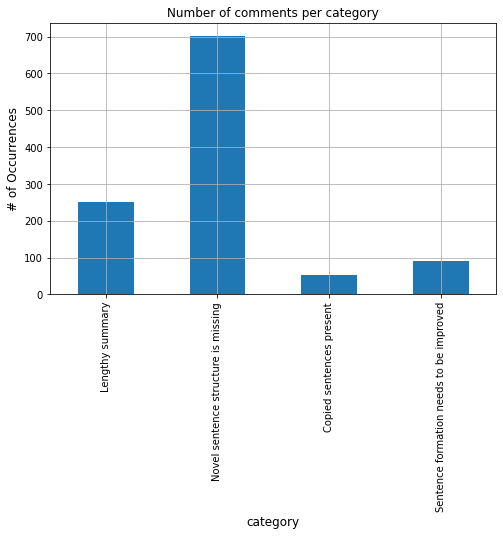

In [ ]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

## Howmany common mistakes have multiple labels?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '# of categories')

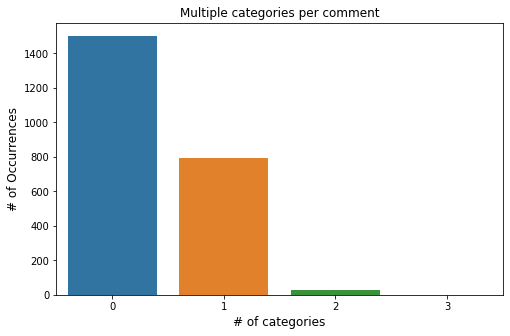

In [ ]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

Vast majority of the comment text are not labeled.


In [ ]:
print('Percentage of comments that are not labelled:')
print(len(df[(df['Lengthy summary']==0) & (df['Novel sentence structure is missing']==0) & (df['Copied sentences present']==0) & (df['Sentence formation needs to be improved']== 0)]) / len(df))
#print(len(df[(df['Relevant information is missing']==0) & (df['Irrelevant information is added']==0) & (df['Out of context information is added']==0) & (df['Misleading original context']== 0) & (df['Factual incorrectness']==0) & (df['Repetitive information is found']==0)]) / len(df))
#print(len(df[(df['Relevant information is missing']==0) & (df['Irrelevant information added']==0) & (df['Out of context information added']==0) & (df['Misleading original context']== 0) & (df['Factual incorrectness']==0) & (df['Repetitive information found']==0)]) / len(df))
#print(len(df[(df['syntax or semantic errors']==0) & (df['coherence issue']== 0) & (df['understandability issue']==0) & (df['unnatural sentence formations ']==0)]) / len(df))

Percentage of comments that are not labelled:
0.5599137931034482


## **The distribution of the number of words in comment texts.**

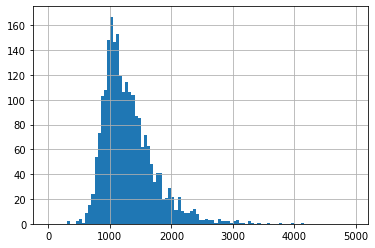

In [ ]:
lens = df.text.str.len()
lens.hist(bins = np.arange(0,5000,50))

There is no missing comment in comment text column.


In [ ]:
print('Number of missing comments in comment text:')
df['text'].isnull().sum()

Number of missing comments in comment text:


0

Have a peek the first comment, the text needs to be cleaned.


In [ ]:
df['text'][0]

'విజయవాడలో ఆర్టీసీ కార్మిక సంఘాల నేతలతో ఎండీ సురేంద్రబాబు సమావేశం ముగిసింది. సమ్మె నోటీసు ఇచ్చిన ఈయూ సహా 10 సంఘాల జేఏసీ నేతలతో ఎండీ సురేంద్రబాబు చర్చించారు. సమావేశం అనంతరం ఎండీ సురేంద్రబాబు సహా ఇతర అధికారులు, కార్మిక సంఘాల నేతలు సచివాలయానికి బయలుదేరి వెళ్లారు. సచివాలయంలో కార్మిక సంఘాల నేతలతో సీఎం జగన్ చర్చలు జరపనున్నారు. సమ్మె నోటీసులోని డిమాండ్ల పరిష్కారంపై సీఎం చర్చించనున్నారు. సీఎంతో చర్చల్లో రవాణా శాఖ మంత్రి పేర్ని నానితో పాటు రవాణా శాఖ ముఖ్య కార్యదర్శి కృష్ణబాబు కూడా పాల్గొననున్నారు. ఆర్టీసీ విలీనానికి సంబంధించి తీసుకుంటున్న చర్యలపై సీఎం జగన్ చర్చించనున్నారు. ఆర్టీసీ కార్మికులు ఎదుర్కొంటున్న సమస్యల పరిష్కారంపై, ప్రభుత్వం నుంచి తాత్కాలిక సాయానికి సంబంధించిన అంశంపై సీఎం వివరించనున్నారు. సీఎం నుంచి హామీ రాగానే సమ్మె యోచన విరమణపై కార్మిక సంఘాలు ప్రకటన చేయనున్నాయి.\nవిజయవాడలో ఆర్టీసీ కార్మిక సంఘాలతో,10 సంఘాల జేఏసీ నేతలతో ఎండీ సురేంద్రబాబు చర్చించి సచివాలయానికి వెళ్లారు. సచివాలయంలో వీరందరితో సీఎం జగన్ సమ్మె నోటీసులోని డిమాండ్ల పరిష్కారంపై, ఆర్టీసీ విలీనానికి గురించి, ఆర్టీసీ కార్మికుల స

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
# df['comment_text'] = df['comment_text'].map(lambda com : clean_text(com))
# df['comment_text'][0]

In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.20, shuffle=True)
train_text = train['text'].values.astype('U')
test_text = test['text'].values.astype('U')
#vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(2,3), norm='l2', max_features = 10000)
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='char', ngram_range=(2,3), norm='l2', max_features = 10000)
#vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', token_pattern = r'\w{1,}', max_features = 10000)
vectorizer.fit(train_text)
vectorizer.fit(test_text)
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['text'], axis=1)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['text'], axis=1)


In [ ]:
# #Binary Relevance
# br_classifier.fit(x_train, y_train)
# br_predictions = br_classifier.predict(x_test)
# print("Accuracy = ",accuracy_score(y_test,br_predictions.toarray()))
# print("F1 score = ",F1_score(y_test,br_predictions, average="micro"))
# print("Hamming loss = ",hamming_loss(y_test,br_predictions))

Split the data to train and test sets:


In [ ]:
#categories = ['Relevant information is missing','Irrelevant information is added', 'Out of context information is added', 'Misleading original context', 'Factual incorrectness', 'Repetitive information is found' ]
#categories = ['Relevant information is missing','Irrelevant information added', 'Out of context information added', 'Misleading original context', 'Factual incorrectness', 'Repetitive information found' ]
#categories = ['syntax or semantic errors', 'coherence issue', 'understandability issue', 'unnatural sentence formations ']
categories = ['Lengthy summary', 'Novel sentence structure is missing', 'Copied sentences present', 'Sentence formation needs to be improved']
train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True)
X_train = train.text
X_test = test.text
print(X_train.shape)
print(X_test.shape)

(1856,)
(464,)


## Classifier Traning

## Naive Bayes

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
accuracy_avg=[]
f1=[]
for category in categories:
    #print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    #print(prediction)
    accuracy_avg.append(accuracy_score(test[category], prediction))
    f1.append(f1_score(test[category], prediction, average="macro"))
    #print(precision_score(test[category], prediction))
    #print(recall_score(test[category], prediction))
    #print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
print(accuracy_avg)
print(f1)
print("Average accuracy for the Relevance is:", sum(accuracy_avg)/len(accuracy_avg))
print("Average fmeaure for the Relevance is:", sum(f1)/len(f1))

[0.5555555555555556, 0.6722222222222223, 0.9944444444444445, 0.7888888888888889, 0.9666666666666667, 0.9611111111111111]
[0.40740740740740744, 0.4019933554817276, 0.4986072423398329, 0.4409937888198758, 0.4915254237288135, 0.49008498583569404]
Average accuracy for the Relevance is: 0.8231481481481482
Average fmeaure for the Relevance is: 0.45510203393555854


# LinearSVC


In [ ]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(class_weight='balanced'), n_jobs=1)),
            ])
accuracy_avg=[]
f1=[]
for category in categories:
    #print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    accuracy_avg.append(accuracy_score(test[category], prediction))
    f1.append(f1_score(test[category], prediction, average= "macro"))
print(accuracy_avg)
print(f1)
#print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
#print("Average accuracy for the Relevance is:", sum(accuracy_avg)/len(accuracy_avg))
print("Average accuracy for the Readability is:", sum(accuracy_avg)/len(accuracy_avg))
print("Average fmeaure for the Relevance is:", sum(f1)/len(f1))

[0.5388888888888889, 0.5111111111111111, 0.9944444444444445, 0.7, 0.9611111111111111, 0.9611111111111111]
[0.5336933112768812, 0.4403617863199548, 0.4986072423398329, 0.5496664195700519, 0.4900849858356941, 0.49008498583569404]
Average accuracy for the Readability is: 0.7777777777777778
Average fmeaure for the Relevance is: 0.5004164551963515


## Logistic Regression

In [ ]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag', class_weight='balanced'), n_jobs=1)),
            ])
f1=[]
for category in categories:
    #print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    accuracy_avg.append(accuracy_score(test[category], prediction))
    f1.append(f1_score(test[category], prediction, average= "macro"))
    #print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
print(accuracy_avg)
print(f1)
#print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
#print("Average accuracy for the Relevance is:", sum(accuracy_avg)/len(accuracy_avg))
print("Average accuracy for the Readability is:", sum(accuracy_avg)/len(accuracy_avg))
print("Average accuracy for the Readability is:", sum(f1)/len(f1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['text'], df[df.columns[1:]], test_size=0.2, random_state=200, shuffle=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='char', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [ ]:
# Note: Session might be crashed while running the data of with zero labels
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# mlb = MultiLabelBinarizer()
# pred = mlb.fit_transform(predictions.toarray())
# actual = mlb.fit_transform(y_test)
# f1 = f1_score(actual)
# print("f1_score: ", f1) 

print('AUC score: {}'.format(roc_auc_score(y_test,predictions.toarray())))
print('Accuracy score: {}'.format(accuracy_score(y_test,predictions.toarray())))
print('F1 score: {}'.format(f1_score(y_test,predictions.toarray(), average="macro")))
#f1.append(f1_score(test[category], prediction, average= "macro"))


In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
classifier = ClassifierChain(LogisticRegression())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print('AUC score: {}'.format(roc_auc_score(y_test,predictions.toarray())))
print('Accuracy score: {}'.format(accuracy_score(y_test,predictions.toarray())))
print('F1 score: {}'.format(f1_score(y_test,predictions.toarray(), average="macro")))

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X_train, y_train)
predictions = clf.predict(X_test)
print('AUC score: {}'.format(roc_auc_score(y_test,predictions)))
print('Accuracy score: {}'.format(accuracy_score(y_test,predictions)))
print('F1 score: {}'.format(f1_score(y_test,predictions, average="macro")))

AUC score: 0.4960425146992311
Accuracy score: 0.5926724137931034
F1 score: 0.03225806451612903


In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
# create XGBoost instance with default hyper-parameters
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic')

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
clf = multilabel_model.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('AUC score: {}'.format(roc_auc_score(y_test,predictions)))
print('Accuracy score: {}'.format(accuracy_score(y_test,predictions)))
print('F1 score: {}'.format(f1_score(y_test,predictions, average="macro")))

AUC score: 0.5145934755862702
Accuracy score: 0.5560344827586207
F1 score: 0.06584971720980339


In [ ]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression
classifier = LabelPowerset(LogisticRegression())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print('AUC score: {}'.format(roc_auc_score(y_test,predictions.toarray())))
print('Accuracy score: {}'.format(accuracy_score(y_test,predictions.toarray())))
print('F1 score: {}'.format(f1_score(y_test,predictions.toarray(), average="macro")))

In [ ]:
import numpy as np
from skmultilearn.adapt import MLkNN
#from sklearn.linear_model import LogisticRegression
classifier = MLkNN(k=30)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print('AUC score: {}'.format(roc_auc_score(y_test,predictions.toarray())))
print('Accuracy score: {}'.format(accuracy_score(y_test,predictions.toarray())))

In [ ]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
import time

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
score = 'f1_micro'

start=time.time()

classifier = GridSearchCV(MLkNN(), parameters, scoring=score)
classifier.fit(X_train, y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')
print('best parameters :', classifier.best_params_, 'best score: ',
      clf.best_score_)


In [ ]:
def patk(actual, pred, k):
	#we return 0 if k is 0 because 
	#   we can't divide the no of common values by 0 
	if k == 0:
		return 0

	#taking only the top k predictions in a class 
	k_pred = pred[:k]
  #print(len(pred[:k]))

	#taking the set of the actual values 
	actual_set = set(actual)
  #print(actual_set)

	#taking the set of the predicted values 
	pred_set = set(k_pred)
  #print(pred_set)
	#taking the intersection of the actual set and the pred set
		# to find the common values
	common_values = actual_set.intersection(pred_set)
  #print(len(common_values))
	return len(common_values)/len(pred[:k])

#defining the values of the actual and the predicted class
y_true = [1 ,2, 0]
y_pred = [1, 1, 0]

if __name__ == "__main__":
    print(patk(y_true, y_pred,3))
    #print(len(pred[:k]))


0.6666666666666666


##References

1. https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5
2.https://medium.datadriveninvestor.com/multi-label-classification-case-study-stackoverflow-tag-predictor-832bb6bc18db
3. https://datascience.stackexchange.com/questions/40900/whats-the-difference-between-sklearn-f1-score-micro-and-weighted-for-a-mult